In [46]:
import glob
import pandas as pd
import numpy as np

import os
import re

In [47]:
attack = "crownibp"

In [48]:
results_folder = rf"results\{attack}"

In [49]:
algorithms = ["baseline","noise","fgsm","pgd","crownibp"]
exclude_datasets = ["Dialysis","divorce","Pbc3","vlbw"]

In [99]:
# CI , IBS , NegLL
metric = "NegLL"

In [100]:
ascending = False if metric=="CI" else True

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{metric}.xlsx")
    excels.extend(glob.glob(glob_search))

for dataset in exclude_datasets:
    for exceli in excels:
        if dataset in exceli:
            print("remove ",dataset)
            excels.remove(exceli)

remove  Dialysis
remove  Dialysis
remove  Dialysis
remove  Dialysis
remove  divorce
remove  divorce
remove  divorce
remove  divorce
remove  Pbc3
remove  Pbc3
remove  Pbc3
remove  Pbc3
remove  vlbw
remove  vlbw
remove  vlbw
remove  vlbw


In [101]:
len(excels)/(len(algorithms)-1)

10.0

In [102]:
df = pd.DataFrame()
N_datasets = len(excels)
percentage_change = []
print(excels)
for excel_i in excels:

    temp_df = pd.read_excel(excel_i)
    folder_name,dataset_name = excel_i.split("\\")[-3:-1]
    temp_df.columns = ["eps"] + temp_df.columns[1:].to_list()
    col_name = (dataset_name,re.sub("results_","",folder_name))
    df[col_name] = temp_df[f"Robust {metric}"] #temp_df["Non Robust CI"].round(3).astype(str) + " / " + temp_df["Robust CI"].round(3).astype(str)

    col_name = (dataset_name,"baseline")
    df[col_name] = temp_df[f"Non Robust {metric}"]

df.index = temp_df.eps

['results\\crownibp\\results_crownibp\\Aids2\\NegLL.xlsx', 'results\\crownibp\\results_crownibp\\dataDIVAT1\\NegLL.xlsx', 'results\\crownibp\\results_crownibp\\flchain\\NegLL.xlsx', 'results\\crownibp\\results_crownibp\\Framingham\\NegLL.xlsx', 'results\\crownibp\\results_crownibp\\LeukSurv\\NegLL.xlsx', 'results\\crownibp\\results_crownibp\\prostate\\NegLL.xlsx', 'results\\crownibp\\results_crownibp\\retinopathy\\NegLL.xlsx', 'results\\crownibp\\results_crownibp\\stagec\\NegLL.xlsx', 'results\\crownibp\\results_crownibp\\TRACE\\NegLL.xlsx', 'results\\crownibp\\results_crownibp\\zinc\\NegLL.xlsx', 'results\\crownibp\\results_fgsm\\Aids2\\NegLL.xlsx', 'results\\crownibp\\results_fgsm\\dataDIVAT1\\NegLL.xlsx', 'results\\crownibp\\results_fgsm\\flchain\\NegLL.xlsx', 'results\\crownibp\\results_fgsm\\Framingham\\NegLL.xlsx', 'results\\crownibp\\results_fgsm\\LeukSurv\\NegLL.xlsx', 'results\\crownibp\\results_fgsm\\prostate\\NegLL.xlsx', 'results\\crownibp\\results_fgsm\\retinopathy\\NegLL.

In [103]:
micolumns = pd.MultiIndex.from_tuples(df.columns)
dfmi = (
    pd.DataFrame(
        df.values,
        index=df.index,
        columns=micolumns,
    )
    .sort_index()
    .sort_index(axis=1)
)

dfmi.sort_values(by="eps",ascending=False,inplace=True)
dfmi = dfmi.reindex(columns=algorithms, level=1)


In [104]:
dfmi[dfmi==''] = np.NaN
dfmi = dfmi.astype(float)
dfmi

Aids2                                                         \
           baseline         noise          fgsm           pgd     crownibp   
eps                                                                          
2.00  867218.625000  1.664442e+09  5.247136e+07  4.170300e+07  1013.211182   
1.00   11408.425781  3.843492e+05  6.768741e+04  5.493030e+04   529.279114   
0.80    4595.645508  6.678125e+04  1.776805e+04  1.489971e+04   522.198975   
0.70    2868.485596  2.779730e+04  8.894230e+03  7.577893e+03   521.521118   
0.60    1798.874268  1.135636e+04  4.351412e+03  3.794776e+03   521.171753   
0.50    1159.978516  4.424974e+03  2.142487e+03  1.915283e+03   520.945190   
0.10     515.993896  5.196252e+02  5.187775e+02  5.186812e+02   521.655640   
0.07     516.228821  5.188468e+02  5.188582e+02  5.188345e+02   521.751038   
0.05     516.784729  5.191172e+02  5.191102e+02  5.190440e+02   521.819092   
0.00     518.514893  5.208565e+02  5.195742e+02  5.194845e+02   521.989746   

        Framingham                                                         \
          baseline         noise          fgsm           pgd     crownibp   
eps                                                                         
2.00  2.773980e+08  2.340486e+13  3.644450e+11  1.258766e+14  3173.424072   
1.00  1.469826e+05  1.265825e+07  1.953815e+06  2.014873e+07  1660.723877   
0.80  3.417634e+04  8.028578e+05  1.836632e+05  9.573399e+05  1582.725342   
0.70  1.676882e+04  2.061154e+05  5.695138e+04  2.129752e+05  1555.807251   
0.60  8.469119e+03  5.383214e+04  1.809951e+04  4.876955e+04  1534.328003   
0.50  4.569461e+03  1.484013e+04  6.330102e+03  1.211749e+04  1517.369385   
0.10  1.538615e+03  1.541365e+03  1.506851e+03  1.499732e+03  1486.024292   
0.07  1.518785e+03  1.520424e+03  1.499243e+03  1.495175e+03  1485.611938   
0.05  1.509515e+03  1.511206e+03  1.495991e+03  1.493774e+03  1485.464355   
0.00  1.497968e+03  1.501406e+03  1.492858e+03  1.493241e+03  1485.527222   

      ...        stagec                                            \
      ...      baseline         noise          fgsm           pgd   
eps   ...                                                           
2.00  ...  1.491603e+12  5.955046e+12  4.591150e+10  3.632862e+10   
1.00  ...  1.161569e+06  2.070726e+06  1.796648e+05  1.538292e+05   
0.80  ...  7.496040e+04  1.143366e+05  1.672986e+04  1.469834e+04   
0.70  ...  1.853756e+04  2.733591e+04  5.226173e+03  4.627388e+03   
0.60  ...  4.810933e+03  6.494227e+03  1.638094e+03  1.474163e+03   
0.50  ...  1.282302e+03  1.608063e+03  5.300793e+02  4.837622e+02   
0.10  ...  4.104847e+01  4.103425e+01  3.957289e+01  3.934553e+01   
0.07  ...  4.007188e+01  3.998076e+01  3.916440e+01  3.899010e+01   
0.05  ...  3.975593e+01  3.960278e+01  3.907390e+01  3.891127e+01   
0.00  ...  3.966661e+01  3.950724e+01  3.916957e+01  3.904496e+01   

                             zinc                                            \
           crownibp      baseline         noise          fgsm           pgd   
eps                                                                           
2.00  580507.312500  1.725447e+13  8.805155e+15  5.331321e+13  3.805171e+13   
1.00    1032.293945  2.621423e+06  2.929443e+07  2.503320e+06  2.546512e+06   
0.80     330.232391  1.326696e+05  7.761540e+05  9.493627e+04  8.271138e+04   
0.70     194.125397  3.129429e+04  1.320493e+05  2.105466e+04  1.874853e+04   
0.60     120.920013  7.434188e+03  2.336807e+04  4.885672e+03  4.430068e+03   
0.50      82.148254  1.868499e+03  4.454716e+03  1.243473e+03  1.133289e+03   
0.10      38.943516  8.256099e+01  8.171708e+01  7.661854e+01  7.659334e+01   
0.07      38.505737  7.886884e+01  7.833759e+01  7.559594e+01  7.570814e+01   
0.05      38.301704  7.711427e+01  7.689701e+01  7.531229e+01  7.548814e+01   
0.00      38.086372  7.463243e+01  7.533926e+01  7.565608e+01  7.597625e+01   

                     
           crownibp  
eps                  
2.00 

In [105]:
# dfmi.T.groupby(axis=0,level=0).rank(axis=0,na_option='bottom',method="average",ascending=ascending)

In [106]:
best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=0,na_option='bottom',method="average",ascending=ascending)
best_per_dataset_rank

C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\996602392.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=0,na_option='bottom',method="average",ascending=ascending)
C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\996602392.py:1: FutureWarning: The 'axis' keyword in DataFrameGroupBy.rank is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=0,na_option='bottom',method="average",ascending=ascending)


Aids2                          Framingham                           \
     baseline noise fgsm  pgd crownibp   baseline noise fgsm  pgd crownibp   
eps                                                                          
2.00      2.0   5.0  4.0  3.0      1.0        2.0   4.0  3.0  5.0      1.0   
1.00      2.0   5.0  4.0  3.0      1.0        2.0   4.0  3.0  5.0      1.0   
0.80      2.0   5.0  4.0  3.0      1.0        2.0   4.0  3.0  5.0      1.0   
0.70      2.0   5.0  4.0  3.0      1.0        2.0   4.0  3.0  5.0      1.0   
0.60      2.0   5.0  4.0  3.0      1.0        2.0   5.0  3.0  4.0      1.0   
0.50      2.0   5.0  4.0  3.0      1.0        2.0   5.0  3.0  4.0      1.0   
0.10      1.0   4.0  3.0  2.0      5.0        4.0   5.0  3.0  2.0      1.0   
0.07      1.0   3.0  4.0  2.0      5.0        4.0   5.0  3.0  2.0      1.0   
0.05      1.0   4.0  3.0  2.0      5.0        4.0   5.0  3.0  2.0      1.0   
0.00      1.0   4.0  3.0  2.0      5.0        4.0   5.0  2.0  3.0      1.0   

      ...   stagec                              zinc                           
      ... baseline noise fgsm  pgd crownibp baseline noise fgsm  pgd crownibp  
eps   ...                                                                      
2.00  ...      4.0   5.0  3.0  2.0      1.0      2.0   5.0  4.0  3.0      1.0  
1.00  ...      4.0   5.0  3.0  2.0      1.0      4.0   5.0  2.0  3.0      1.0  
0.80  ...      4.0   5.0  3.0  2.0      1.0      4.0   5.0  3.0  2.0      1.0  
0.70  ...      4.0   5.0  3.0  2.0      1.0      4.0   5.0  3.0  2.0      1.0  
0.60  ...      4.0   5.0  3.0  2.0      1.0      4.0   5.0  3.0  2.0      1.0  
0.50  ...      4.0   5.0  3.0  2.0      1.0      4.0   5.0  3.0  2.0      1.0  
0.10  ...      5.0   4.0  3.0  2.0      1.0      5.0   4.0  2.0  1.0      3.0  
0.07  ...      5.0   4.0  3.0  2.0      1.0      5.0   4.0  1.0  2.0      3.0  
0.05  ...      5.0   4.0  3.0  2.0      1.0      4.0   3.0  1.0  2.0      5.0  
0.00  ...      5.0   4.0  3.0  2.0      1.0      1.0   2.0  3.0  4.0      5.0  

[10 rows x 50 columns]

In [107]:
best_per_dataset_avg_rank = best_per_dataset_rank.stack(level=1).mean(1).unstack(1).sort_values(by="eps",ascending=False)
best_per_dataset_avg_rank

baseline  noise  fgsm  pgd  crownibp
eps                                       
2.00       2.9    4.3   3.7  3.1       1.0
1.00       3.1    4.5   3.4  3.0       1.0
0.80       3.0    4.6   3.5  2.9       1.0
0.70       3.1    4.5   3.5  2.9       1.0
0.60       3.0    4.7   3.5  2.8       1.0
0.50       3.0    4.7   3.5  2.8       1.0
0.10       3.5    4.5   3.2  2.2       1.6
0.07       3.5    4.4   3.2  2.3       1.6
0.05       3.3    4.4   3.0  2.4       1.9
0.00       2.6    4.1   3.5  2.8       2.0

In [108]:
if not ascending:
    best_per_dataset = dfmi.groupby(level=0,axis=1).idxmax(1)
else:
    best_per_dataset = dfmi.groupby(level=0,axis=1).idxmin(1)
best_per_dataset.applymap(lambda x: x[1])

C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\1722459016.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  best_per_dataset = dfmi.groupby(level=0,axis=1).idxmin(1)
C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\1722459016.py:4: FutureWarning: DataFrameGroupBy.idxmin with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  best_per_dataset = dfmi.groupby(level=0,axis=1).idxmin(1)
C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\1722459016.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  best_per_dataset.applymap(lambda x: x[1])


Aids2 Framingham  LeukSurv     TRACE dataDIVAT1   flchain  prostate  \
eps                                                                            
2.00  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
1.00  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.80  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.70  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.60  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.50  crownibp   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.10  baseline   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.07  baseline   crownibp  crownibp  crownibp   crownibp  crownibp  crownibp   
0.05  baseline   crownibp  crownibp  crownibp   baseline  crownibp  crownibp   
0.00  baseline   crownibp  crownibp       pgd   baseline  crownibp  crownibp   

     retinopathy    stagec      zinc  
eps                                   
2.00    crownibp  crownibp  crownibp  
1.00    crownibp  crownibp  crownibp  
0.80    crownibp  crownibp  crownibp  
0.70    crownibp  crownibp  crownibp  
0.60    crownibp  crownibp  crownibp  
0.50    crownibp  crownibp  crownibp  
0.10    crownibp  crownibp       pgd  
0.07    crownibp  crownibp      fgsm  
0.05    crownibp  crownibp      fgsm  
0.00    crownibp  crownibp  baseline

In [109]:
if metric != "NegLL":
     # aggregate all the CI files
    os.listdir(results_folder)
    excels = []
    for folder in os.listdir(results_folder):
        glob_search = os.path.join(results_folder,folder,f"{metric}_all.xlsx")
        excels.extend(glob.glob(glob_search))
        
    df = pd.DataFrame()
    N_datasets = len(excels)
    percentage_change = []
    for excel_i in excels:
    
        temp_df = pd.read_excel(excel_i)
        folder_name = excel_i.split("\\")[-2]
        temp_df.columns = ["eps"] + temp_df.columns[1:].to_list()
        col_name = re.sub("results_","",folder_name)
        df[col_name] = temp_df["%"] #temp_df["Non Robust CI"].round(3).astype(str) + " / " + temp_df["Robust CI"].round(3).astype(str)
    
    df.index = temp_df.eps
    df = df.reindex(columns=algorithms[1:], level=1)

In [110]:
df

(Aids2, crownibp)  (Aids2, baseline)  (dataDIVAT1, crownibp)  \
eps                                                                  
2.00        1013.211182      867218.625000            20130.279297   
1.00         529.279114       11408.425781              918.089050   
0.80         522.198975        4595.645508              821.152588   
0.70         521.521118        2868.485596              800.327820   
0.60         521.171753        1798.874268              785.855286   
0.50         520.945190        1159.978516              774.627319   
0.10         521.655640         515.993896              751.842834   
0.07         521.751038         516.228821              751.301270   
0.05         521.819092         516.784729              751.017822   
0.00         521.989746         518.514893              750.566772   

      (dataDIVAT1, baseline)  (flchain, crownibp)  (flchain, baseline)  \
eps                                                                      
2.00            3.917180e+06         1.400884e+12                  NaN   
1.00            1.433132e+04         6.307257e+03         3.350622e+23   
0.80            4.946042e+03         1.425336e+03         2.564323e+18   
0.70            3.008757e+03         1.194910e+03         7.372112e+15   
0.60            1.914498e+03         1.115522e+03         2.230515e+13   
0.50            1.311128e+03         1.089056e+03         6.824825e+10   
0.10            7.562355e+02         1.069681e+03         2.033814e+03   
0.07            7.522886e+02         1.069362e+03         1.443374e+03   
0.05            7.505762e+02         1.069202e+03         1.250709e+03   
0.00            7.489963e+02         1.068962e+03         1.086299e+03   

      (Framingham, crownibp)  (Framingham, baseline)  (LeukSurv, crownibp)  \
eps                                                                          
2.00             3173.424072            2.773980e+08          1.823708e+08   
1.00             1660.723877            1.469826e+05          2.070530e+04   
0.80             1582.725342            3.417634e+04          3.497367e+03   
0.70             1555.807251            1.676882e+04          1.449703e+03   
0.60             1534.328003            8.469119e+03          6.617680e+02   
0.50             1517.369385            4.569461e+03          3.453903e+02   
0.10             1486.024292            1.538615e+03          2.538090e+02   
0.07             1485.611938            1.518785e+03          2.525576e+02   
0.05             1485.464355            1.509515e+03          2.518111e+02   
0.00             1485.527222            1.497968e+03          2.503751e+02   

      (LeukSurv, baseline)  ...  (Aids2, pgd)  (dataDIVAT1, pgd)  \
eps                         ...                                    
2.00          1.106893e+13  ...  4.170300e+07       2.058669e+25   
1.00          1.785559e+07  ...  5.493030e+04       1.845385e+11   
0.80          1.287392e+06  ...  1.489971e+04       3.472836e+08   
0.70          3.476977e+05  ...  7.577893e+03       1.747805e+07   
0.60          9.290364e+04  ...  3.794776e+03       9.390763e+05   
0.50          2.525104e+04  ...  1.915283e+03       6.136595e+04   
0.10          3.097333e+02  ...  5.186812e+02       7.574421e+02   
0.07          2.844385e+02  ...  5.188345e+02       7.561345e+02   
0.05          2.735241e+02  ...  5.190440e+02       7.560538e+02   
0.00          2.577119e+02  ...  5.194845e+02       7.569608e+02   

      (flchain, pgd)  (Framingham, pgd)  (LeukSurv, pgd)  (prostate, pgd)  \
eps                                                                         
2.00             inf       1.258766e+14     2.998791e+30     1.691516e+26   
1.00    1.304035e+16       2.014873e+07     1.284540e+15     8.837224e+12   
0.80    4.929555e+11       9.573399e+05     1.031830e+12     2.175150e+10   
0.70    3.470649e+09       2.129752e+05     2.670271e+10     1.136398e+09   
0.60    4.597551e+07       4.876955e+04     7.957938e+08    

In [111]:
excel_name = os.path.join(results_folder,f"{metric}_all.xlsx")
with pd.ExcelWriter(excel_name) as writer:  
    dfmi.applymap(lambda x: np.round(x,3)).to_excel(writer,sheet_name=metric)
    best_per_dataset_rank.to_excel(writer,sheet_name="rank")
    best_per_dataset_avg_rank.to_excel(writer,sheet_name="average_rank")
    best_per_dataset.applymap(lambda x: x[1]).to_excel(writer,sheet_name="best")
    df.to_excel(writer,sheet_name="%")

C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\229516633.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfmi.applymap(lambda x: np.round(x,3)).to_excel(writer,sheet_name=metric)
C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\229516633.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  best_per_dataset.applymap(lambda x: x[1]).to_excel(writer,sheet_name="best")


In [112]:
best_per_dataset_avg_rank.index = ["{:.2f}".format(float(x)) for x in np.round(best_per_dataset_avg_rank.index.tolist(),2)]
best_per_dataset_avg_rank.index.name = r"$\epsilon$"
print(best_per_dataset_avg_rank.applymap(lambda x: str(np.round(x,2))).to_latex(index=True))

\begin{tabular}{llllll}
\toprule
 & baseline & noise & fgsm & pgd & crownibp \\
$\epsilon$ &  &  &  &  &  \\
\midrule
2.00 & 2.9 & 4.3 & 3.7 & 3.1 & 1.0 \\
1.00 & 3.1 & 4.5 & 3.4 & 3.0 & 1.0 \\
0.80 & 3.0 & 4.6 & 3.5 & 2.9 & 1.0 \\
0.70 & 3.1 & 4.5 & 3.5 & 2.9 & 1.0 \\
0.60 & 3.0 & 4.7 & 3.5 & 2.8 & 1.0 \\
0.50 & 3.0 & 4.7 & 3.5 & 2.8 & 1.0 \\
0.10 & 3.5 & 4.5 & 3.2 & 2.2 & 1.6 \\
0.07 & 3.5 & 4.4 & 3.2 & 2.3 & 1.6 \\
0.05 & 3.3 & 4.4 & 3.0 & 2.4 & 1.9 \\
0.00 & 2.6 & 4.1 & 3.5 & 2.8 & 2.0 \\
\bottomrule
\end{tabular}



C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\3581541270.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(best_per_dataset_avg_rank.applymap(lambda x: str(np.round(x,2))).to_latex(index=True))


In [113]:
if metric == "NegLL":
    dfmi.index = ["{:.2f}".format(float(x)) for x in np.round(dfmi.index.tolist(),2)]
    dfmi.index.name = r"$\epsilon$"
    print(dfmi.applymap(lambda x: np.round(x,3)).applymap(lambda x: "{:.2e}".format(x)).to_latex(index=True,multicolumn_format="c"))
else:
    dfmi.index = ["{:.2f}".format(float(x)) for x in np.round(dfmi.index.tolist(),2)]
    dfmi.index.name = r"$\epsilon$"
    print(dfmi.applymap(lambda x: np.round(x,3)).applymap(str).to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{lllllllllllllllllllllllllllllllllllllllllllllllllll}
\toprule
 & \multicolumn{5}{c}{Aids2} & \multicolumn{5}{c}{Framingham} & \multicolumn{5}{c}{LeukSurv} & \multicolumn{5}{c}{TRACE} & \multicolumn{5}{c}{dataDIVAT1} & \multicolumn{5}{c}{flchain} & \multicolumn{5}{c}{prostate} & \multicolumn{5}{c}{retinopathy} & \multicolumn{5}{c}{stagec} & \multicolumn{5}{c}{zinc} \\
 & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp \\
$\epsilon$ &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
2.00 & 

C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\718377934.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dfmi.applymap(lambda x: np.round(x,3)).applymap(lambda x: "{:.2e}".format(x)).to_latex(index=True,multicolumn_format="c"))


In [114]:
dataset_names = np.array(list(map(np.array,dfmi.columns)))[:,0]

In [115]:
dataset_names

array(['Aids2', 'Aids2', 'Aids2', 'Aids2', 'Aids2', 'Framingham',
       'Framingham', 'Framingham', 'Framingham', 'Framingham', 'LeukSurv',
       'LeukSurv', 'LeukSurv', 'LeukSurv', 'LeukSurv', 'TRACE', 'TRACE',
       'TRACE', 'TRACE', 'TRACE', 'dataDIVAT1', 'dataDIVAT1',
       'dataDIVAT1', 'dataDIVAT1', 'dataDIVAT1', 'flchain', 'flchain',
       'flchain', 'flchain', 'flchain', 'prostate', 'prostate',
       'prostate', 'prostate', 'prostate', 'retinopathy', 'retinopathy',
       'retinopathy', 'retinopathy', 'retinopathy', 'stagec', 'stagec',
       'stagec', 'stagec', 'stagec', 'zinc', 'zinc', 'zinc', 'zinc',
       'zinc'], dtype='<U11')

## LONG TABLE

In [116]:
dfmi.T

$\epsilon$                    2.00          1.00          0.80          0.70  \
Aids2       baseline  8.672186e+05  1.140843e+04  4.595646e+03  2.868486e+03   
            noise     1.664442e+09  3.843492e+05  6.678125e+04  2.779730e+04   
            fgsm      5.247136e+07  6.768741e+04  1.776805e+04  8.894230e+03   
            pgd       4.170300e+07  5.493030e+04  1.489971e+04  7.577893e+03   
            crownibp  1.013211e+03  5.292791e+02  5.221990e+02  5.215211e+02   
Framingham  baseline  2.773980e+08  1.469826e+05  3.417634e+04  1.676882e+04   
            noise     2.340486e+13  1.265825e+07  8.028578e+05  2.061154e+05   
            fgsm      3.644450e+11  1.953815e+06  1.836632e+05  5.695138e+04   
            pgd       1.258766e+14  2.014873e+07  9.573399e+05  2.129752e+05   
            crownibp  3.173424e+03  1.660724e+03  1.582725e+03  1.555807e+03   
LeukSurv    baseline  1.106893e+13  1.785559e+07  1.287392e+06  3.476977e+05   
            noise              NaN  5.462128e+23  7.984648e+18  2.515152e+16   
            fgsm      2.099578e+34  8.336075e+16  3.104599e+13  4.860001e+11   
            pgd       2.998791e+30  1.284540e+15  1.031830e+12  2.670271e+10   
            crownibp  1.823708e+08  2.070530e+04  3.497367e+03  1.449703e+03   
TRACE       baseline  9.018457e+19  4.556603e+09  4.438467e+07  4.611652e+06   
            noise     2.254761e+18  9.113339e+08  1.336189e+07  1.743518e+06   
            fgsm      3.629078e+25  2.006374e+11  4.307880e+08  2.239299e+07   
            pgd       8.507489e+18  4.530066e+08  5.348799e+06  6.115734e+05   
            crownibp  1.427029e+04  8.788078e+02  6.815215e+02  6.291030e+02   
dataDIVAT1  baseline  3.917180e+06  1.433132e+04  4.946042e+03  3.008757e+03   
            noise     5.447165e+17  5.692504e+08  1.045614e+07  1.440791e+06   
            fgsm      2.663558e+17  2.484267e+08  4.654484e+06  6.555311e+05   
            pgd       2.058669e+25  1.845385e+11  3.472836e+08  1.747805e+07   
            crownibp  2.013028e+04  9.180891e+02  8.211526e+02  8.003278e+02   
flchain     baseline           NaN  3.350622e+23  2.564323e+18  7.372112e+15   
            noise              NaN  2.180088e+35  7.580132e+26  4.678509e+22   
            fgsm               NaN  1.611211e+20  7.792479e+14  1.856526e+12   
            pgd                inf  1.304035e+16  4.929555e+11  3.470649e+09   
            crownibp  1.400884e+12  6.307257e+03  1.425336e+03  1.194910e+03   
prostate    baseline  1.238172e+11  9.744662e+05  1.060174e+05  3.580381e+04   
            noise              NaN  7.003906e+20  3.745058e+16  2.847128e+14   
            fgsm      4.996576e+29  3.157805e+14  3.396284e+11  1.158556e+10   
            pgd       1.691516e+26  8.837224e+12  2.175150e+10  1.136398e+09   
            crownibp  2.186372e+08  9.650851e+03  1.657152e+03  8.477151e+02   
retinopathy baseline  1.571184e+07  1.111571e+04  2.875831e+03  1.507540e+03   
            noise     1.508189e+07  1.105398e+04  2.879890e+03  1.505390e+03   
            fgsm      6.920141e+06  7.434518e+03  2.065935e+03  1.120698e+03   
            pgd       6.762288e+06  7.303170e+03  2.043456e+03  1.108950e+03   
            crownibp  6.036831e+03  4.022658e+02  2.794194e+02  2.414843e+02   
stagec      baseline  1.491603e+12  1.161569e+06  7.496040e+04  1.853756e+04   
            noise     5.955046e+12  2.070726e+06  1.143366e+05  2.733591e+04   
            fgsm      4.591150e+10  1.796648e+05  1.672986e+04  5.226173e+03   
            pgd       3.632862e+10  1.538292e+05  1.469834e+04  4.627388e+03   
            crownibp  5.805073e+05  1.032294e+03  3.302324e+02  1.941254e+02   
zinc        baseline  1.725447e+13  2.621423e+06  1.326696e+05  3.129429e+04   
            noise     8.805155e+15  2.929443e+07  7.761540e+05  1.320493e+05   
            fgsm      5.331321e+13  2.503320e+06  9.493627e+04  2.105466e+04   
            pgd       3.805171e+13  2.546512e+06  8.271138e+04  1.874853e+04   


In [118]:
# print(dfmi.T.applymap(lambda x: str(np.round(x,3))).to_latex(index=True,multicolumn_format="c"))


print(dfmi.T.applymap(lambda x: str(np.round(x,3))).applymap(lambda x: "{:.2e}".format(float(x))).to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{llllllllllll}
\toprule
 & $\epsilon$ & 2.00 & 1.00 & 0.80 & 0.70 & 0.60 & 0.50 & 0.10 & 0.07 & 0.05 & 0.00 \\
\midrule
\multirow[t]{5}{*}{Aids2} & baseline & 8.67e+05 & 1.14e+04 & 4.60e+03 & 2.87e+03 & 1.80e+03 & 1.16e+03 & 5.16e+02 & 5.16e+02 & 5.17e+02 & 5.19e+02 \\
 & noise & 1.66e+09 & 3.84e+05 & 6.68e+04 & 2.78e+04 & 1.14e+04 & 4.42e+03 & 5.20e+02 & 5.19e+02 & 5.19e+02 & 5.21e+02 \\
 & fgsm & 5.25e+07 & 6.77e+04 & 1.78e+04 & 8.89e+03 & 4.35e+03 & 2.14e+03 & 5.19e+02 & 5.19e+02 & 5.19e+02 & 5.20e+02 \\
 & pgd & 4.17e+07 & 5.49e+04 & 1.49e+04 & 7.58e+03 & 3.79e+03 & 1.92e+03 & 5.19e+02 & 5.19e+02 & 5.19e+02 & 5.19e+02 \\
 & crownibp & 1.01e+03 & 5.29e+02 & 5.22e+02 & 5.22e+02 & 5.21e+02 & 5.21e+02 & 5.22e+02 & 5.22e+02 & 5.22e+02 & 5.22e+02 \\
\cline{1-12}
\multirow[t]{5}{*}{Framingham} & baseline & 2.77e+08 & 1.47e+05 & 3.42e+04 & 1.68e+04 & 8.47e+03 & 4.57e+03 & 1.54e+03 & 1.52e+03 & 1.51e+03 & 1.50e+03 \\
 & noise & 2.34e+13 & 1.27e+07 & 8.03e+05 & 2.06e+05 & 5.38

C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\3944217298.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dfmi.T.applymap(lambda x: str(np.round(x,3))).applymap(lambda x: "{:.2e}".format(float(x))).to_latex(index=True,multicolumn_format="c"))


In [119]:
# print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: str(np.round(x,3))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))

print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: "{:.2e}".format(float(x))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{lllllllllll}
\toprule
$\epsilon$ & 2.00 & 1.00 & 0.80 & 0.70 & 0.60 & 0.50 & 0.10 & 0.07 & 0.05 & 0.00 \\
\midrule
baseline & 1.00e+19 & 3.35e+22 & 2.56e+17 & 7.37e+14 & 2.23e+12 & 6.82e+09 & 6.42e+02 & 5.73e+02 & 5.49e+02 & 5.27e+02 \\
noise & 4.01e+17 & 2.18e+34 & 7.58e+25 & 4.68e+21 & 3.48e+17 & 2.65e+13 & 7.49e+03 & 4.70e+03 & 3.55e+03 & 1.91e+03 \\
fgsm & 2.33e+33 & 1.61e+19 & 8.11e+13 & 2.35e+11 & 1.40e+09 & 2.04e+07 & 6.45e+02 & 6.03e+02 & 5.85e+02 & 5.61e+02 \\
pgd & inf & 1.43e+15 & 1.55e+11 & 3.13e+09 & 9.02e+07 & 2.77e+06 & 5.81e+02 & 5.60e+02 & 5.52e+02 & 5.41e+02 \\
crownibp & 1.40e+11 & 4.34e+03 & 1.13e+03 & 7.73e+02 & 6.29e+02 & 5.67e+02 & 5.23e+02 & 5.23e+02 & 5.22e+02 & 5.22e+02 \\
\bottomrule
\end{tabular}



C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\1478614380.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: "{:.2e}".format(float(x))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))


In [73]:
dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().reindex(algorithms)

$\epsilon$      2.00      1.00      0.80      0.70      0.60      0.50  \
baseline    0.403605  0.463319  0.487696  0.501066  0.518352  0.539862   
noise       0.425605  0.464702  0.487067  0.498373  0.514542  0.539780   
fgsm        0.410975  0.462735  0.489204  0.518857  0.573139  0.622292   
pgd         0.396224  0.456525  0.491194  0.538949  0.590204  0.626431   
crownibp    0.438051  0.591550  0.632489  0.651641  0.666422  0.682545   

$\epsilon$      0.10      0.07      0.05      0.00  
baseline    0.692529  0.691133  0.692536  0.693733  
noise       0.685246  0.683937  0.682710  0.683411  
fgsm        0.684761  0.686197  0.685872  0.685453  
pgd         0.686047  0.686589  0.687479  0.686922  
crownibp    0.697029  0.697629  0.698496  0.701005

In [74]:
dfmi.T.groupby(level=0).mean()

$\epsilon$       2.00      1.00      0.80      0.70      0.60      0.50  \
Aids2        0.503269  0.510893  0.514015  0.516157  0.517423  0.518249   
Framingham   0.525272  0.616891  0.633050  0.640695  0.647259  0.655202   
LeukSurv     0.491608  0.545681  0.557602  0.566861  0.571148  0.582295   
TRACE        0.464812  0.593769  0.634535  0.656045  0.678775  0.700997   
dataDIVAT1   0.466309  0.557236  0.585674  0.601713  0.615874  0.631316   
flchain      0.135208  0.247538  0.305355  0.394710  0.518915  0.595520   
prostate     0.447840  0.502621  0.519320  0.528350  0.536845  0.551748   
retinopathy  0.451463  0.516179  0.550717  0.564257  0.584337  0.590189   
stagec       0.396154  0.445192  0.475962  0.493269  0.523077  0.571154   
zinc         0.280186  0.341660  0.399069  0.455715  0.531668  0.625148   

$\epsilon$       0.10      0.07      0.05      0.00  
Aids2        0.564746  0.564015  0.563366  0.562223  
Framingham   0.689726  0.689768  0.690048  0.690018  
LeukSurv     0.624037  0.623029  0.623264  0.623098  
TRACE        0.733800  0.734346  0.734721  0.735059  
dataDIVAT1   0.650688  0.648911  0.647977  0.645733  
flchain      0.924704  0.925894  0.926231  0.926455  
prostate     0.607330  0.608592  0.608786  0.610437  
retinopathy  0.604532  0.606254  0.607286  0.608434  
stagec       0.693269  0.691346  0.690385  0.695192  
zinc         0.798391  0.798815  0.802117  0.804403

In [75]:
# pd.set_option('display.max_columns', None)
# print(dfmi)

In [76]:
print(best_per_dataset.applymap(lambda x: x[1]).to_latex(index=False))

\begin{tabular}{llllllllll}
\toprule
Aids2 & Framingham & LeukSurv & TRACE & dataDIVAT1 & flchain & prostate & retinopathy & stagec & zinc \\
\midrule
crownibp & crownibp & baseline & crownibp & fgsm & noise & pgd & baseline & baseline & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & noise & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & noise & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & noise & crownibp & baseline & crownibp & crownibp & crownibp & noise & noise \\
crownibp & crownibp & crownibp & crownibp & baseline & crownibp & crownibp & crownibp & noise & noi

C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\3574660769.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(best_per_dataset.applymap(lambda x: x[1]).to_latex(index=False))


In [77]:
df.index = ["{:.2f}".format(float(x)) for x in np.round(df.index.tolist(),2)]
df.index.name = r"$\epsilon$"
print(df.applymap(lambda x: str(np.round(x,3))).to_latex(index=True))

\begin{tabular}{lllll}
\toprule
 & noise & fgsm & pgd & crownibp \\
$\epsilon$ &  &  &  &  \\
\midrule
2.00 & 35.41 & 3.586 & 19.785 & 28.625 \\
1.00 & 0.533 & 5.01 & 18.021 & 88.898 \\
0.80 & -0.464 & 7.975 & 23.067 & 87.9 \\
0.70 & 0.056 & 16.421 & 43.857 & 84.615 \\
0.60 & -0.27 & 34.288 & 55.328 & 73.955 \\
0.50 & 1.592 & 45.175 & 52.625 & 65.36 \\
0.10 & -1.258 & -0.559 & 0.022 & 1.72 \\
0.07 & -1.301 & -0.26 & 0.252 & 1.729 \\
0.05 & -1.844 & -0.694 & -0.011 & 1.358 \\
0.00 & -1.942 & -0.879 & -0.24 & 1.512 \\
\bottomrule
\end{tabular}



C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\3740848601.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(lambda x: str(np.round(x,3))).to_latex(index=True))


## PDF PICTURES

In [120]:
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import pandas as pd
import re

In [121]:
attack = "crownibp"

In [122]:
results_folder = rf"results\{attack}"

In [123]:
algorithms = ["baseline","noise","fgsm","pgd","crownibp"]

In [126]:
# CI , IBS , NegLL
img_name = "population_curves_attacked_test"

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{img_name}.xlsx")
    excels.extend(glob.glob(glob_search))

for dataset in exclude_datasets:
    for exceli in excels:
        if dataset in exceli:
            print("remove ",dataset)
            excels.remove(exceli)

remove  Dialysis
remove  Dialysis
remove  Dialysis
remove  Dialysis
remove  divorce
remove  divorce
remove  divorce
remove  divorce
remove  Pbc3
remove  Pbc3
remove  Pbc3
remove  Pbc3
remove  vlbw
remove  vlbw
remove  vlbw
remove  vlbw


In [127]:
metadata = 'eps'

In [128]:
n_rows = int(len(excels) / (len(algorithms)-1))
n_cols = int(len(algorithms) - 1)

In [129]:
excels = np.sort(excels)
files = pd.DataFrame(excels.reshape(-1,len(algorithms)-1,order="F"),columns=["crownibp","fgsm","noise","pgd"]).reindex(["noise","fgsm","pgd","crownibp"],axis=1).values

In [130]:
df_population = pd.read_excel(excels[0])

In [131]:
df_population

t    kmf_St  baseline_St  robust_St  robust_eps=2.00  \
0     0.000000  1.000000     1.000000   1.000000         1.000000   
1     0.000606  0.989437     0.999664   0.999656         0.998614   
2     0.001211  0.989437     0.999328   0.999312         0.997230   
3     0.001817  0.989437     0.998992   0.998969         0.995848   
4     0.002422  0.989437     0.998656   0.998625         0.994468   
...        ...       ...          ...        ...              ...   
9995  6.052372  0.114938     0.042002   0.032935         0.000023   
9996  6.052978  0.114938     0.041990   0.032924         0.000023   
9997  6.053584  0.114938     0.041977   0.032913         0.000023   
9998  6.054189  0.114938     0.041965   0.032902         0.000023   
9999  6.054794  0.114938     0.041952   0.032890         0.000023   

      robust_eps=1.00  robust_eps=0.80  robust_eps=0.70  robust_eps=0.60  \
0            1.000000         1.000000         1.000000         1.000000   
1            0.999537         0.999594         0.999607         0.999617   
2            0.999074         0.999188         0.999214         0.999235   
3            0.998611         0.998783         0.998822         0.998852   
4            0.998149         0.998378         0.998429         0.998470   
...               ...              ...              ...              ...   
9995         0.010516         0.018037         0.020412         0.022516   
9996         0.010511         0.018030         0.020404         0.022507   
9997         0.010506         0.018023         0.020396         0.022499   
9998         0.010502         0.018015         0.020388         0.022490   
9999         0.010497         0.018008         0.020380         0.022482   

      robust_eps=0.50  ...  robust_eps=0.05  baseline_eps=2.00  \
0            1.000000  ...         1.000000           1.000000   
1            0.999626  ...         0.999654           0.456330   
2            0.999253  ...         0.999308           0.260942   
3            0.998879  ...         0.998962           0.174246   
4            0.998506  ...         0.998616           0.128313   
...               ...  ...              ...                ...   
9995         0.024593  ...         0.032182           0.000000   
9996         0.024584  ...         0.032171           0.000000   
9997         0.024575  ...         0.032160           0.000000   
9998         0.024566  ...         0.032150           0.000000   
9999         0.024557  ...         0.032139           0.000000   

      baseline_eps=1.00  baseline_eps=0.80  baseline_eps=0.70  \
0          1.000000e+00           1.000000           1.000000   
1          9.869303e-01           0.994353           0.996319   
2          9.740649e-01           0.988744           0.992654   
3          9.614000e-01           0.983172           0.989005   
4          9.489325e-01           0.977638           0.985371   
...                 ...                ...                ...   
9995       4.910484e-07           0.000033           0.000143   
9996       4.906150e-07           0.000033           0.000143   
9997       4.901819e-07           0.000033           0.000143   
9998       4.897498e-07           0.000033           0.000143   
9999       4.893175e-07           0.000033           0.000143   

      baseline_eps=0.60  baseline_eps=0.50  baseline_eps=0.10  \
0              1.000000           1.000000           1.000000   
1              0.997601           0.998427           0.999617   
2              0.995208           0.996857           0.999235   
3              0.992822           0.995289           0.998852   
4              0.990443           0.993724           0.998470   
...                 ...                ...                ...   
9995           0.000439           0.001048           0.027724   
9996           0.000438           0.001047           0.027715   
9997           0.000438           0.001047           0.027705   
9998           0.000438           0.001047     

In [132]:
save_folder = results_folder = os.path.join(fr"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results\{attack}","perturb_curves.pdf")

In [133]:
print(save_folder)

C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results\crownibp\perturb_curves.pdf


0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
6 0
6 1
6 2
6 3
7 0
7 1
7 2
7 3
8 0
8 1
8 2
8 3
9 0
9 1
9 2
9 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\825806439.py:55: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([base1, base2,base3,robust1], labels=labels,


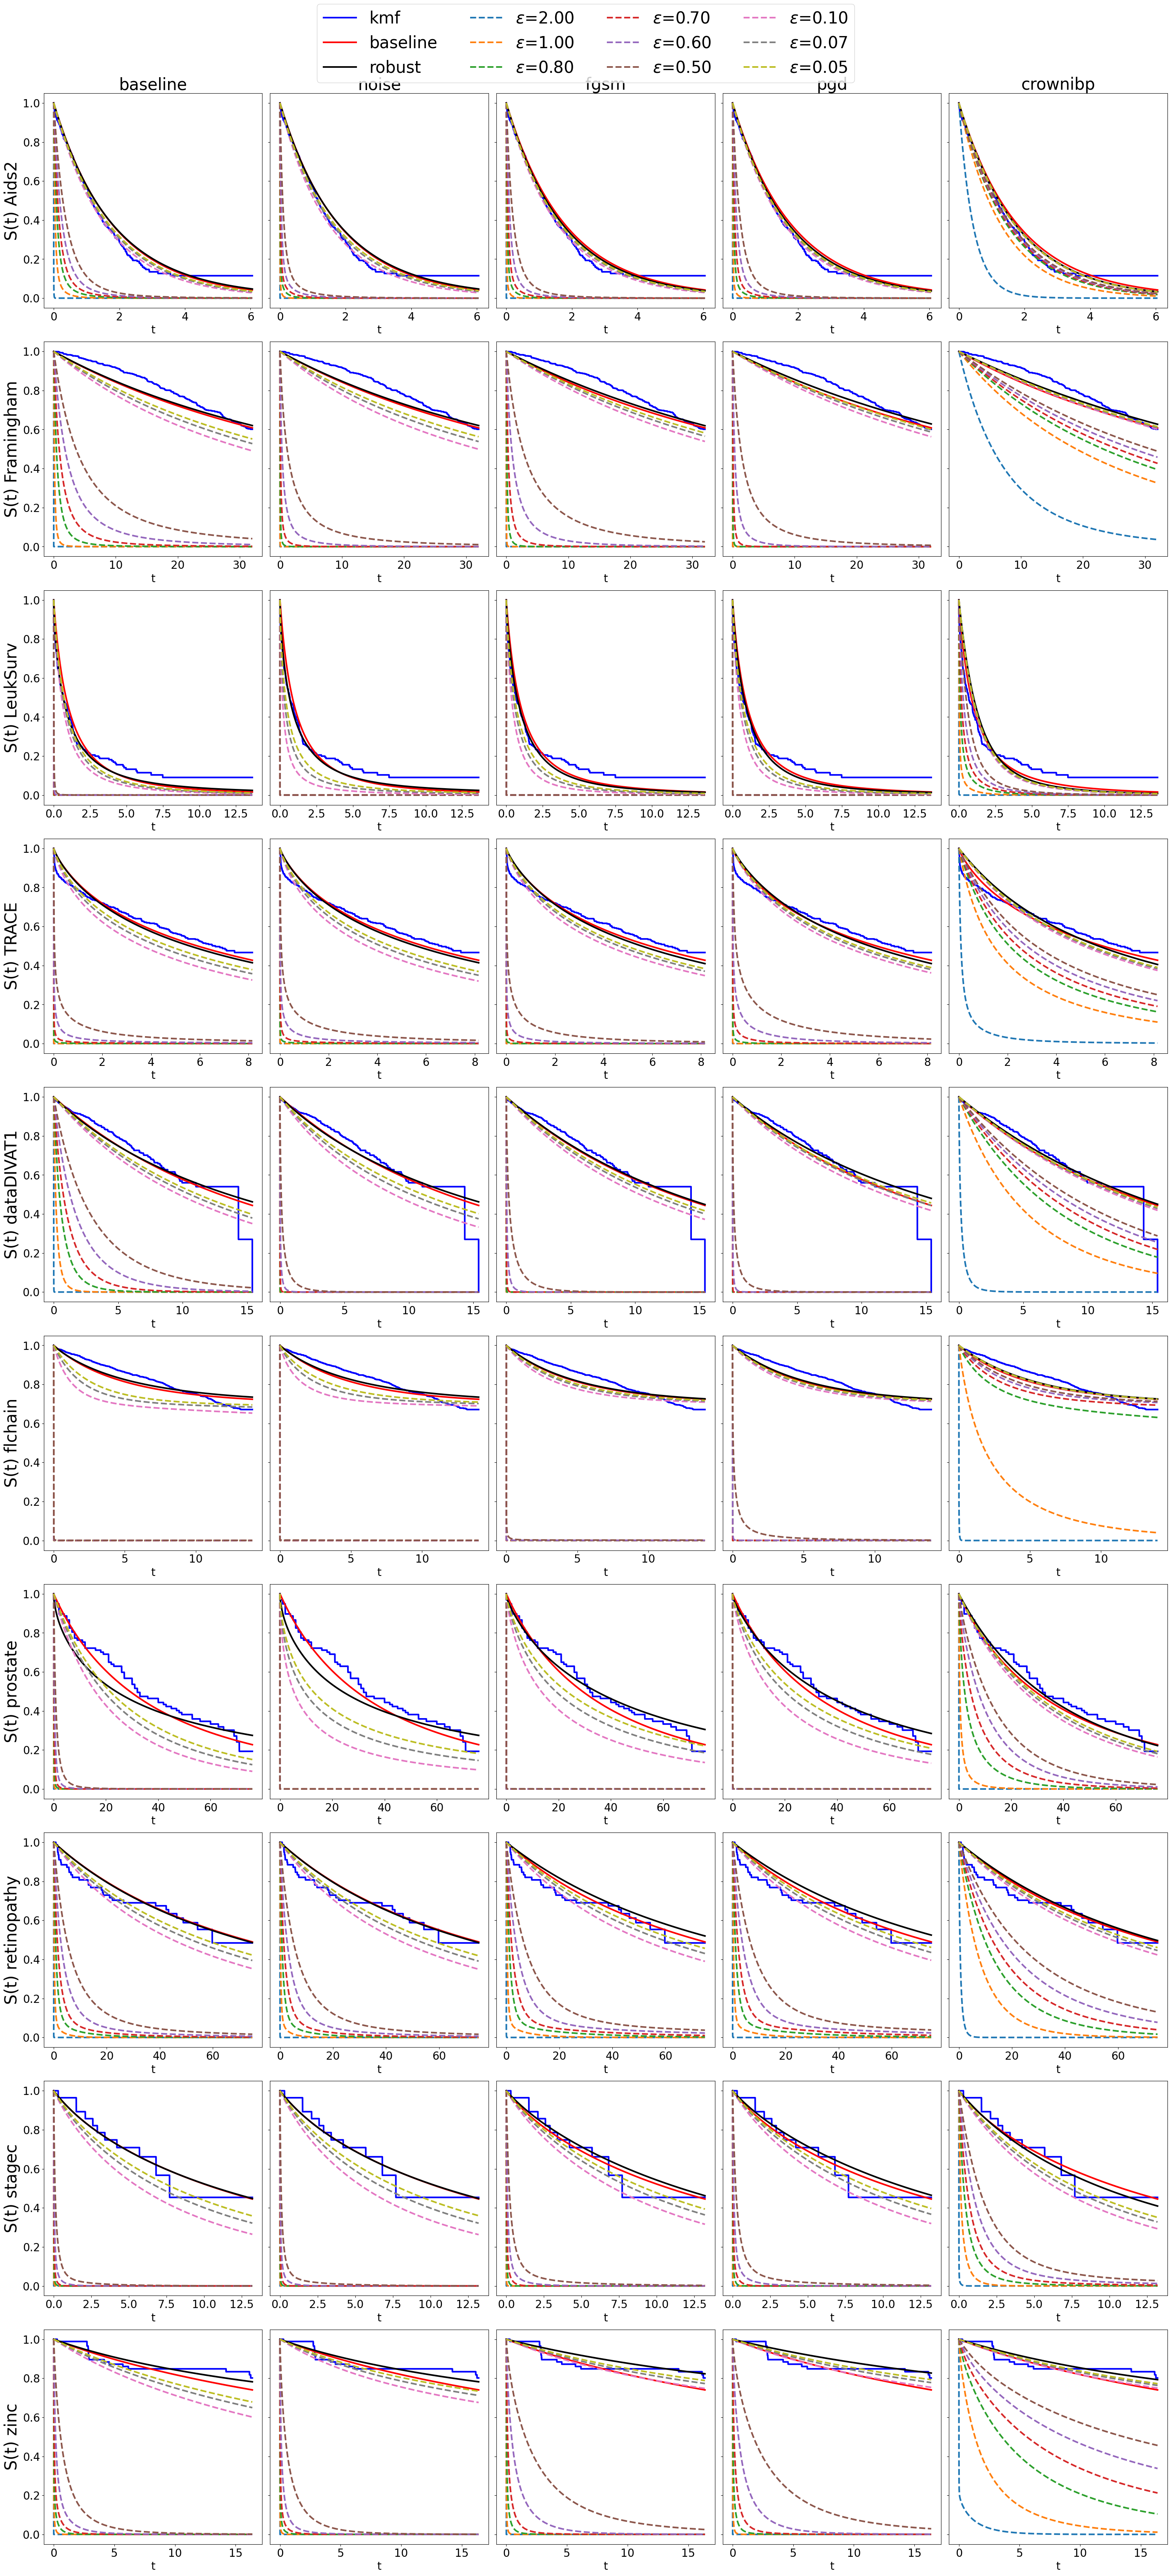

In [136]:
save_folder = results_folder = os.path.join(r"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results",attack,"perturb_curves.pdf")

fig,axes = plt.subplots(n_rows,n_cols+1,figsize=(30,64),sharey=True)

SMALL_SIZE = 20
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

for i in range(n_rows):
    for j in range(n_cols):
        print(i,j)
        fileij = files[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        df_population= df_population.iloc[:,3:]

        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in robust_df.columns]
        baseline_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in baseline_df.columns]
        
        base1 = axes[i][j+1].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
        base2 = axes[i][j+1].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
        base3 = axes[i][j+1].plot(t,base_models.iloc[:,2],linewidth=3,c="k")

  
        robust1 = axes[i][j+1].plot(t,robust_df,'--',linewidth=3)
  
        if j == 0:
            base1 = axes[i][j].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
            base2 = axes[i][j].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
            base3 = axes[i][j].plot(t,base_models.iloc[:,2],linewidth=3,c="k")
            baseline1 = axes[i][j].plot(t,baseline_df,'--',linewidth=3)

            axes[i][j].set_ylabel(f"S(t) {dataset}" ,fontsize=30)
            axes[i][j].set_xlabel("t",fontsize=20)

        axes[i][j+1].set_xlabel("t",fontsize=20)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=30)


labels = base_models.columns.tolist() + robust_df.columns.tolist()
fig.legend([base1, base2,base3,robust1], labels=labels, 
           loc="upper center",ncols=4,fontsize=30,bbox_to_anchor=(.5,1.03)) 

# axes[0][3].legend(base_models.columns.tolist() + robust_df.columns.tolist(),fontsize=20,ncol=2,loc=1)

# plt.legend(base_models.columns.tolist() + robust_df.columns.tolist(),loc='upper center',ncol=5)
plt.tight_layout()
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

In [138]:
files[[-7,-2,-1],:]

array([['results\\crownibp\\results_noise\\TRACE\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_fgsm\\TRACE\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_pgd\\TRACE\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_crownibp\\TRACE\\population_curves_attacked_test.xlsx'],
       ['results\\crownibp\\results_noise\\stagec\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_fgsm\\stagec\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_pgd\\stagec\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_crownibp\\stagec\\population_curves_attacked_test.xlsx'],
       ['results\\crownibp\\results_noise\\zinc\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_fgsm\\zinc\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_pgd\\zinc\\population_curves_attacked_test.xlsx',
        'results\\cro

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\1814279086.py:58: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([base1, base2,base3,robust1], labels=labels,


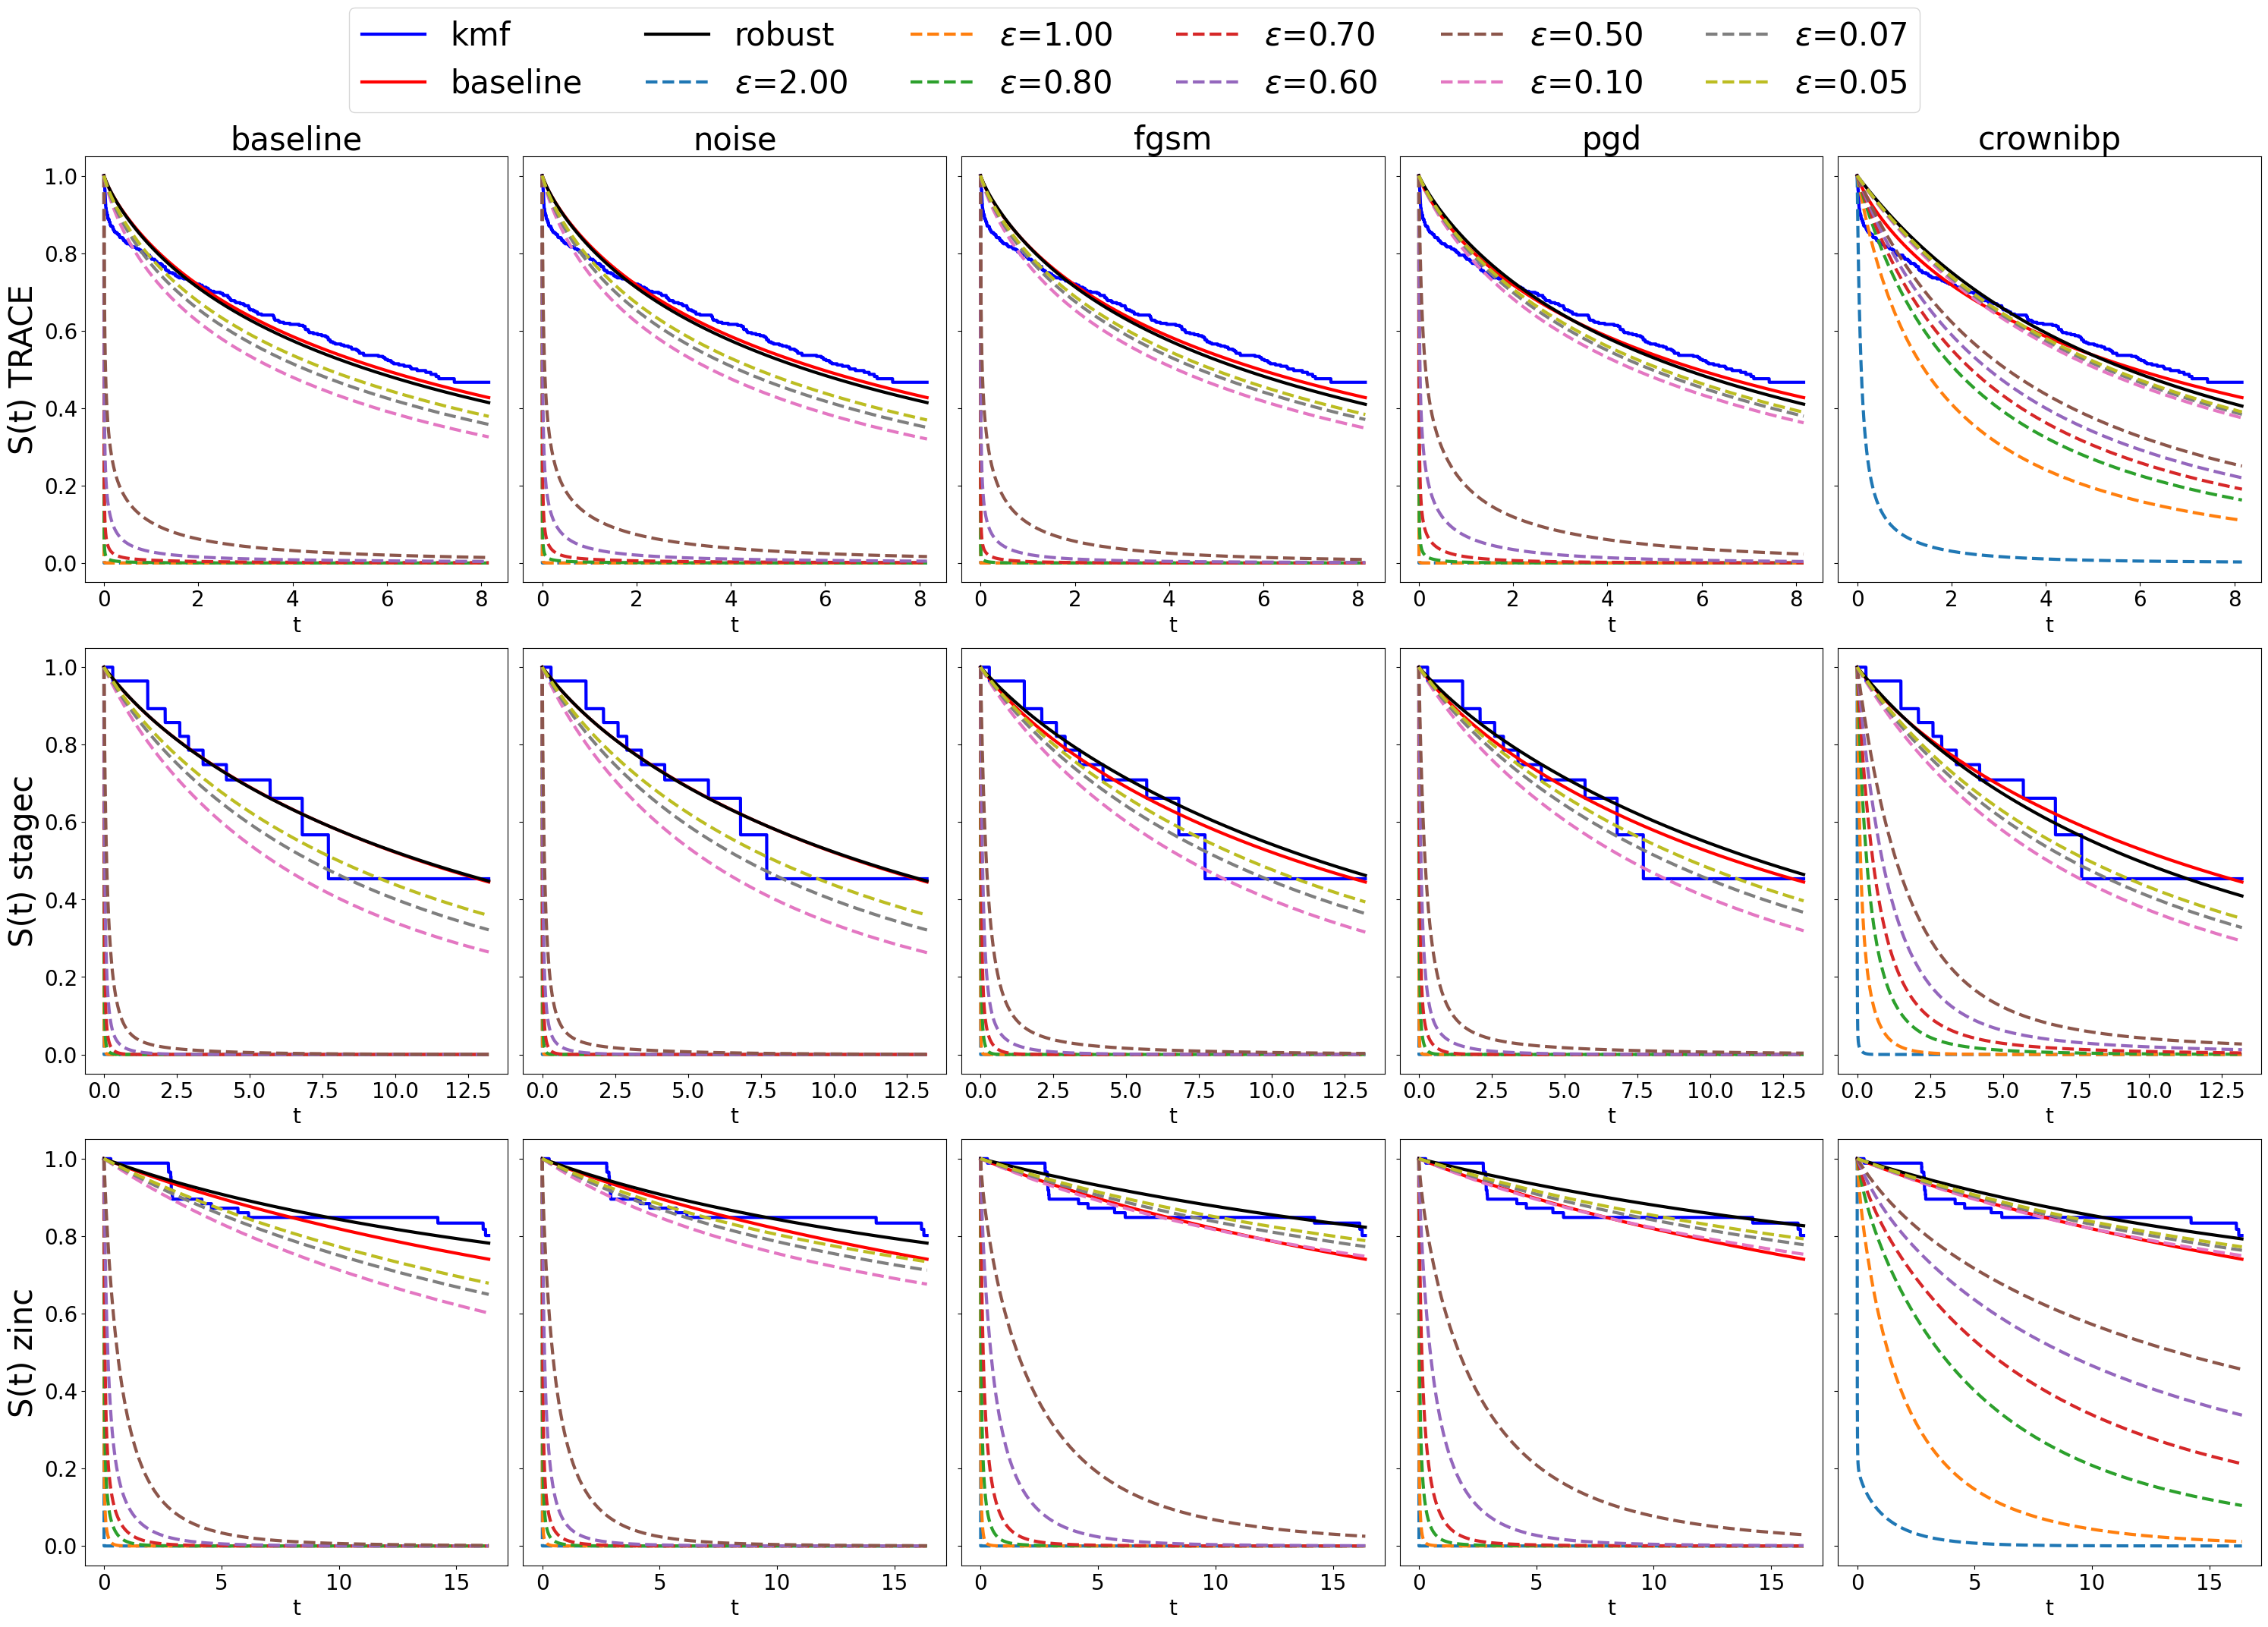

In [141]:
save_folder = results_folder = os.path.join(r"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results",attack,"perturb_curves_subset.pdf")
file_subset = files[[-7,-2,-1],:]

fig,axes = plt.subplots(3,n_cols+1,figsize=(30,20),sharey=True)

SMALL_SIZE = 20
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

for i in range(3):
    for j in range(n_cols):
        print(i,j)
        fileij = file_subset[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        if dataset not in ["TRACE","stagec","zinc"]:
            continue
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        df_population= df_population.iloc[:,3:]

        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in robust_df.columns]
        baseline_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in baseline_df.columns]
        
        base1 = axes[i][j+1].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
        base2 = axes[i][j+1].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
        base3 = axes[i][j+1].plot(t,base_models.iloc[:,2],linewidth=3,c="k")

  
        robust1 = axes[i][j+1].plot(t,robust_df,'--',linewidth=3)
  
        if j == 0:
            base1 = axes[i][j].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
            base2 = axes[i][j].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
            base3 = axes[i][j].plot(t,base_models.iloc[:,2],linewidth=3,c="k")
            baseline1 = axes[i][j].plot(t,baseline_df,'--',linewidth=3)

            axes[i][j].set_ylabel(f"S(t) {dataset}" ,fontsize=30)
            axes[i][j].set_xlabel("t",fontsize=20)

        axes[i][j+1].set_xlabel("t",fontsize=20)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=30)


labels = base_models.columns.tolist() + robust_df.columns.tolist()
fig.legend([base1, base2,base3,robust1], labels=labels, 
           loc="upper center",ncols=6,fontsize=30,bbox_to_anchor=(.5,1.08)) 

# axes[0][3].legend(base_models.columns.tolist() + robust_df.columns.tolist(),fontsize=20,ncol=2,loc=1)

# plt.legend(base_models.columns.tolist() + robust_df.columns.tolist(),loc='upper center',ncol=5)
plt.tight_layout()
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

### DIST PLOTS

In [142]:
# CI , IBS , NegLL
results_folder = fr"results\{attack}"
img_name = "curve_distributions_test"

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{img_name}.xlsx")
    excels.extend(glob.glob(glob_search))

for dataset in exclude_datasets:
    for exceli in excels:
        if dataset in exceli:
            print("remove ",dataset)
            excels.remove(exceli)

remove  Dialysis
remove  Dialysis
remove  Dialysis
remove  Dialysis
remove  divorce
remove  divorce
remove  divorce
remove  divorce
remove  Pbc3
remove  Pbc3
remove  Pbc3
remove  Pbc3
remove  vlbw
remove  vlbw
remove  vlbw
remove  vlbw


In [143]:
excels = np.sort(excels)
files = pd.DataFrame(excels.reshape(-1,len(algorithms)-1,order="F"),columns=["crownibp","fgsm","noise","pgd"]).reindex(["noise","fgsm","pgd","crownibp"],axis=1).values

In [144]:
save_folder = results_folder = os.path.join(r"results",attack,"dist_curves.pdf")

In [145]:
import seaborn as sns

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
6 0
6 1
6 2
6 3
7 0
7 1
7 2
7 3
8 0
8 1
8 2
8 3
9 0
9 1
9 2
9 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\2372327518.py:52: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([mu,q95,q05], labels=labels,


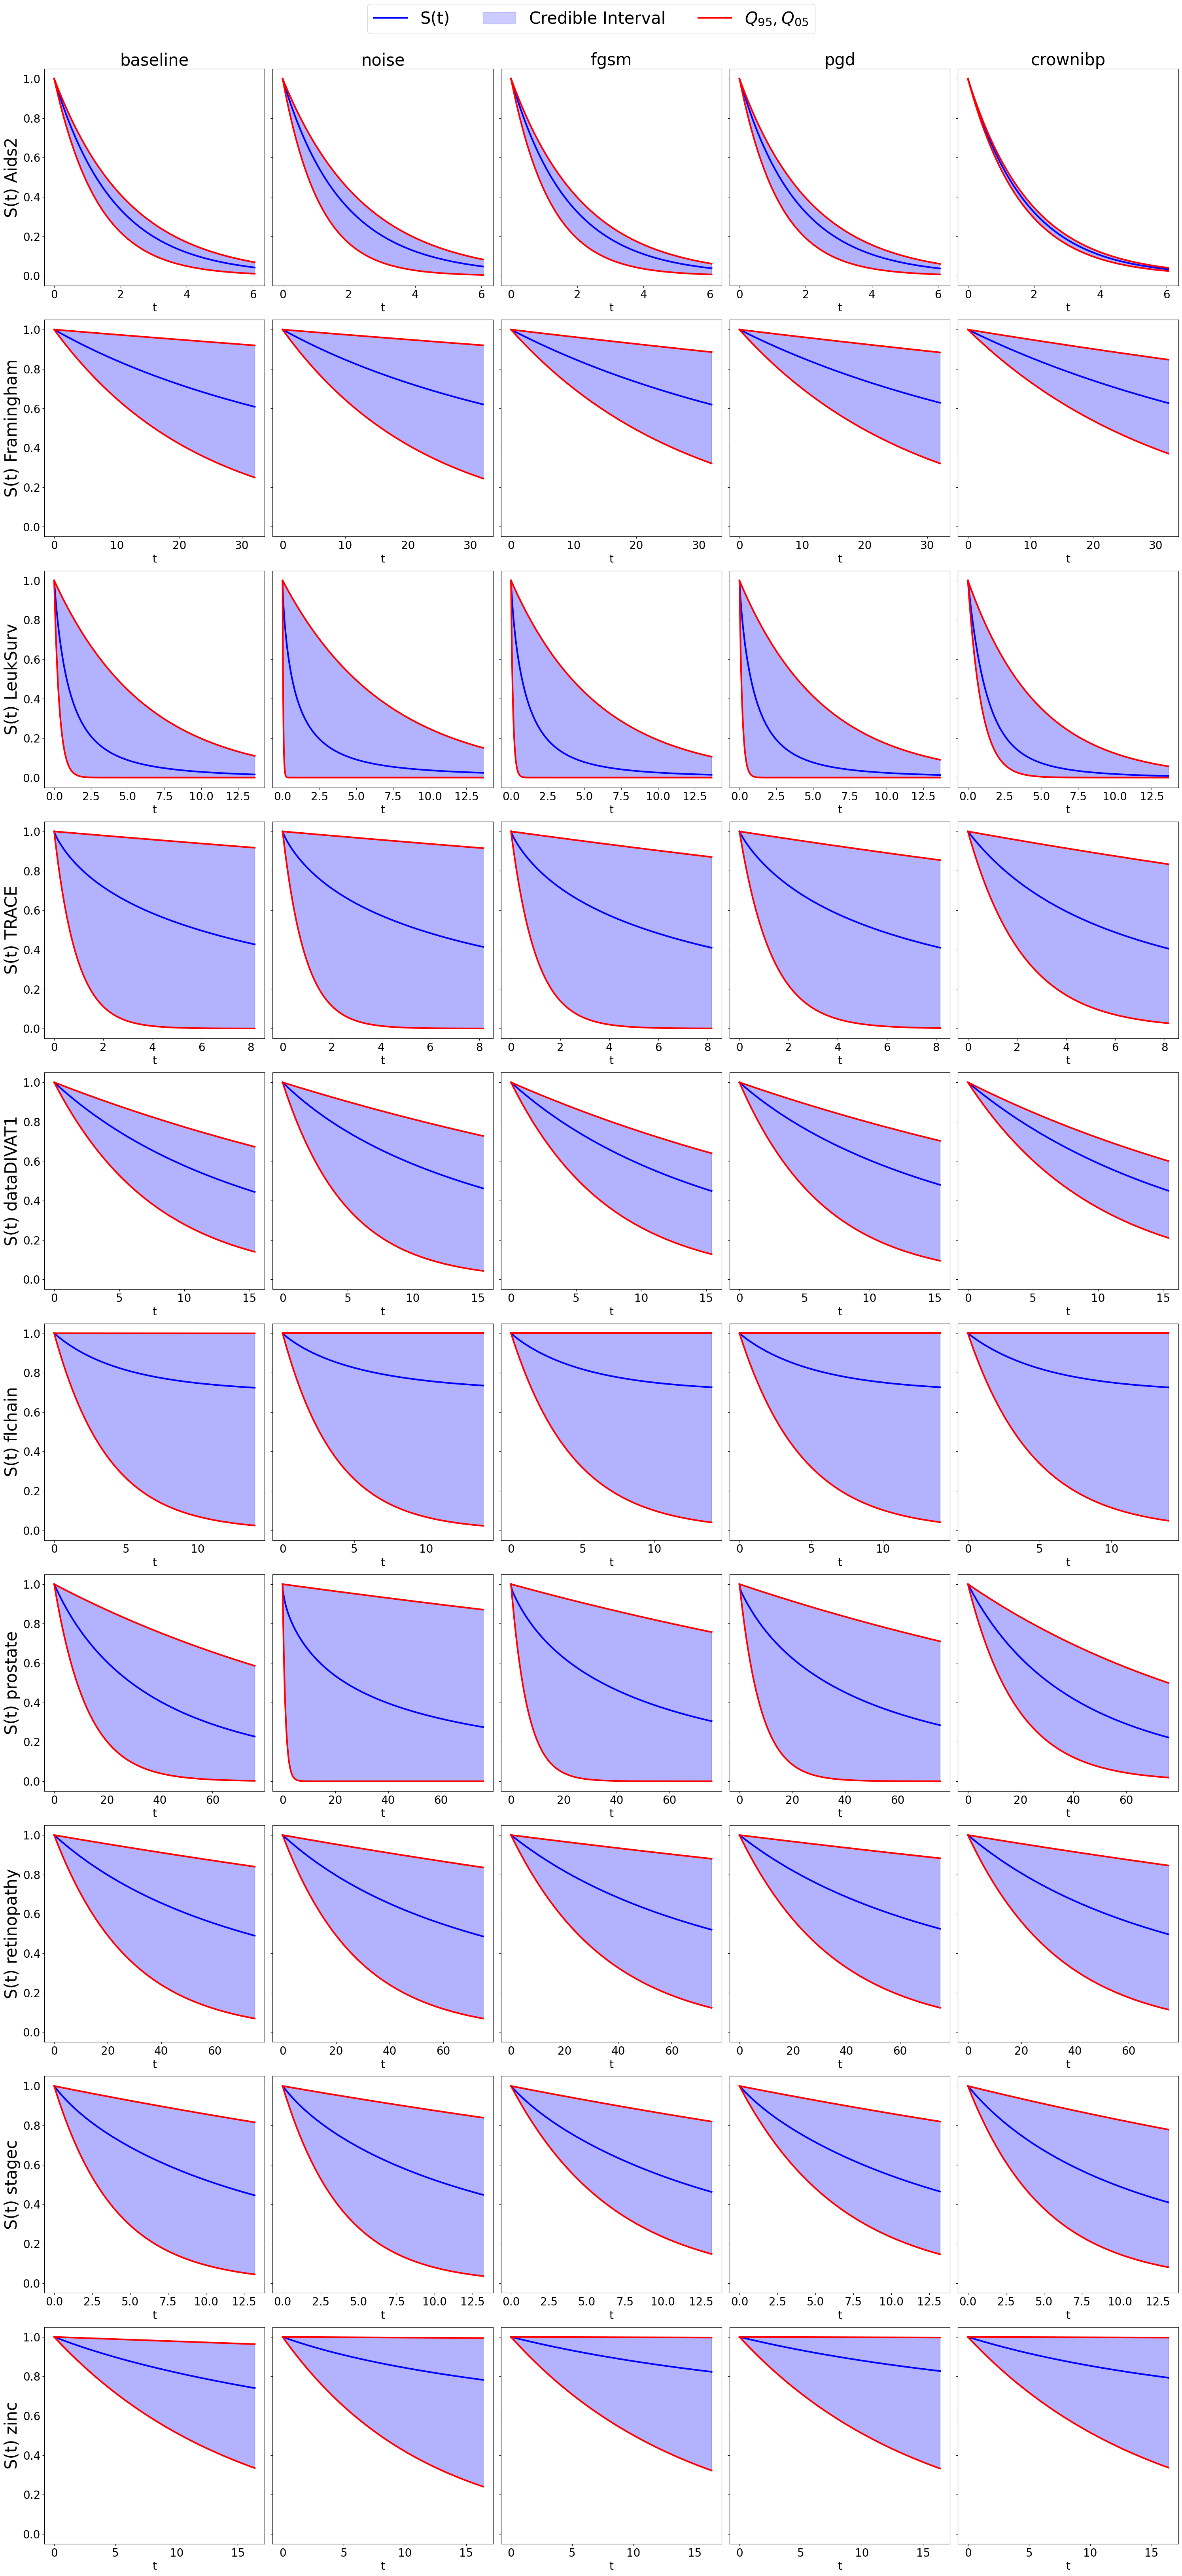

In [148]:
fig,axes = plt.subplots(n_rows,n_cols+1,figsize=(30,64),sharey=True)

SMALL_SIZE = 20
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

for i in range(n_rows):
    for j in range(n_cols):
        print(i,j)
        fileij = files[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = [col.split("_")[1] for col in robust_df.columns]
        baseline_df.columns =[col.split("_")[1] for col in baseline_df.columns]
        
        mu = sns.lineplot(x=t, y=robust_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j+1],c='b',legend=False)
        q95 = sns.lineplot(x=t, y=robust_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        q05 = sns.lineplot(x=t, y=robust_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)

        line = q05.get_lines()
        axes[i][j+1].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
        axes[i][j+1].set_xlabel("t",fontsize=20)

        if j == 0:
            mu = sns.lineplot(x=t, y=baseline_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j],c='b',legend=False)
            q95 = sns.lineplot(x=t, y=baseline_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)
            q05 = sns.lineplot(x=t, y=baseline_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)

            axes[i][j].set_ylabel(f"S(t) {dataset}" ,fontsize=30)
            axes[i][j].set_xlabel("t",fontsize=20)
            line = q05.get_lines()
            axes[i][j].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
            axes[i][j].set_xlabel("t",fontsize=20)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=30)


labels = ["S(t)","Credible Interval","$Q_{95},Q_{05}$"]
fig.legend([mu,q95,q05], labels=labels, 
           loc="upper center",ncols=4,fontsize=30,bbox_to_anchor=(.5,1.02)) 

plt.tight_layout()
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_16388\2408430024.py:54: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([mu,q95,q05], labels=labels,


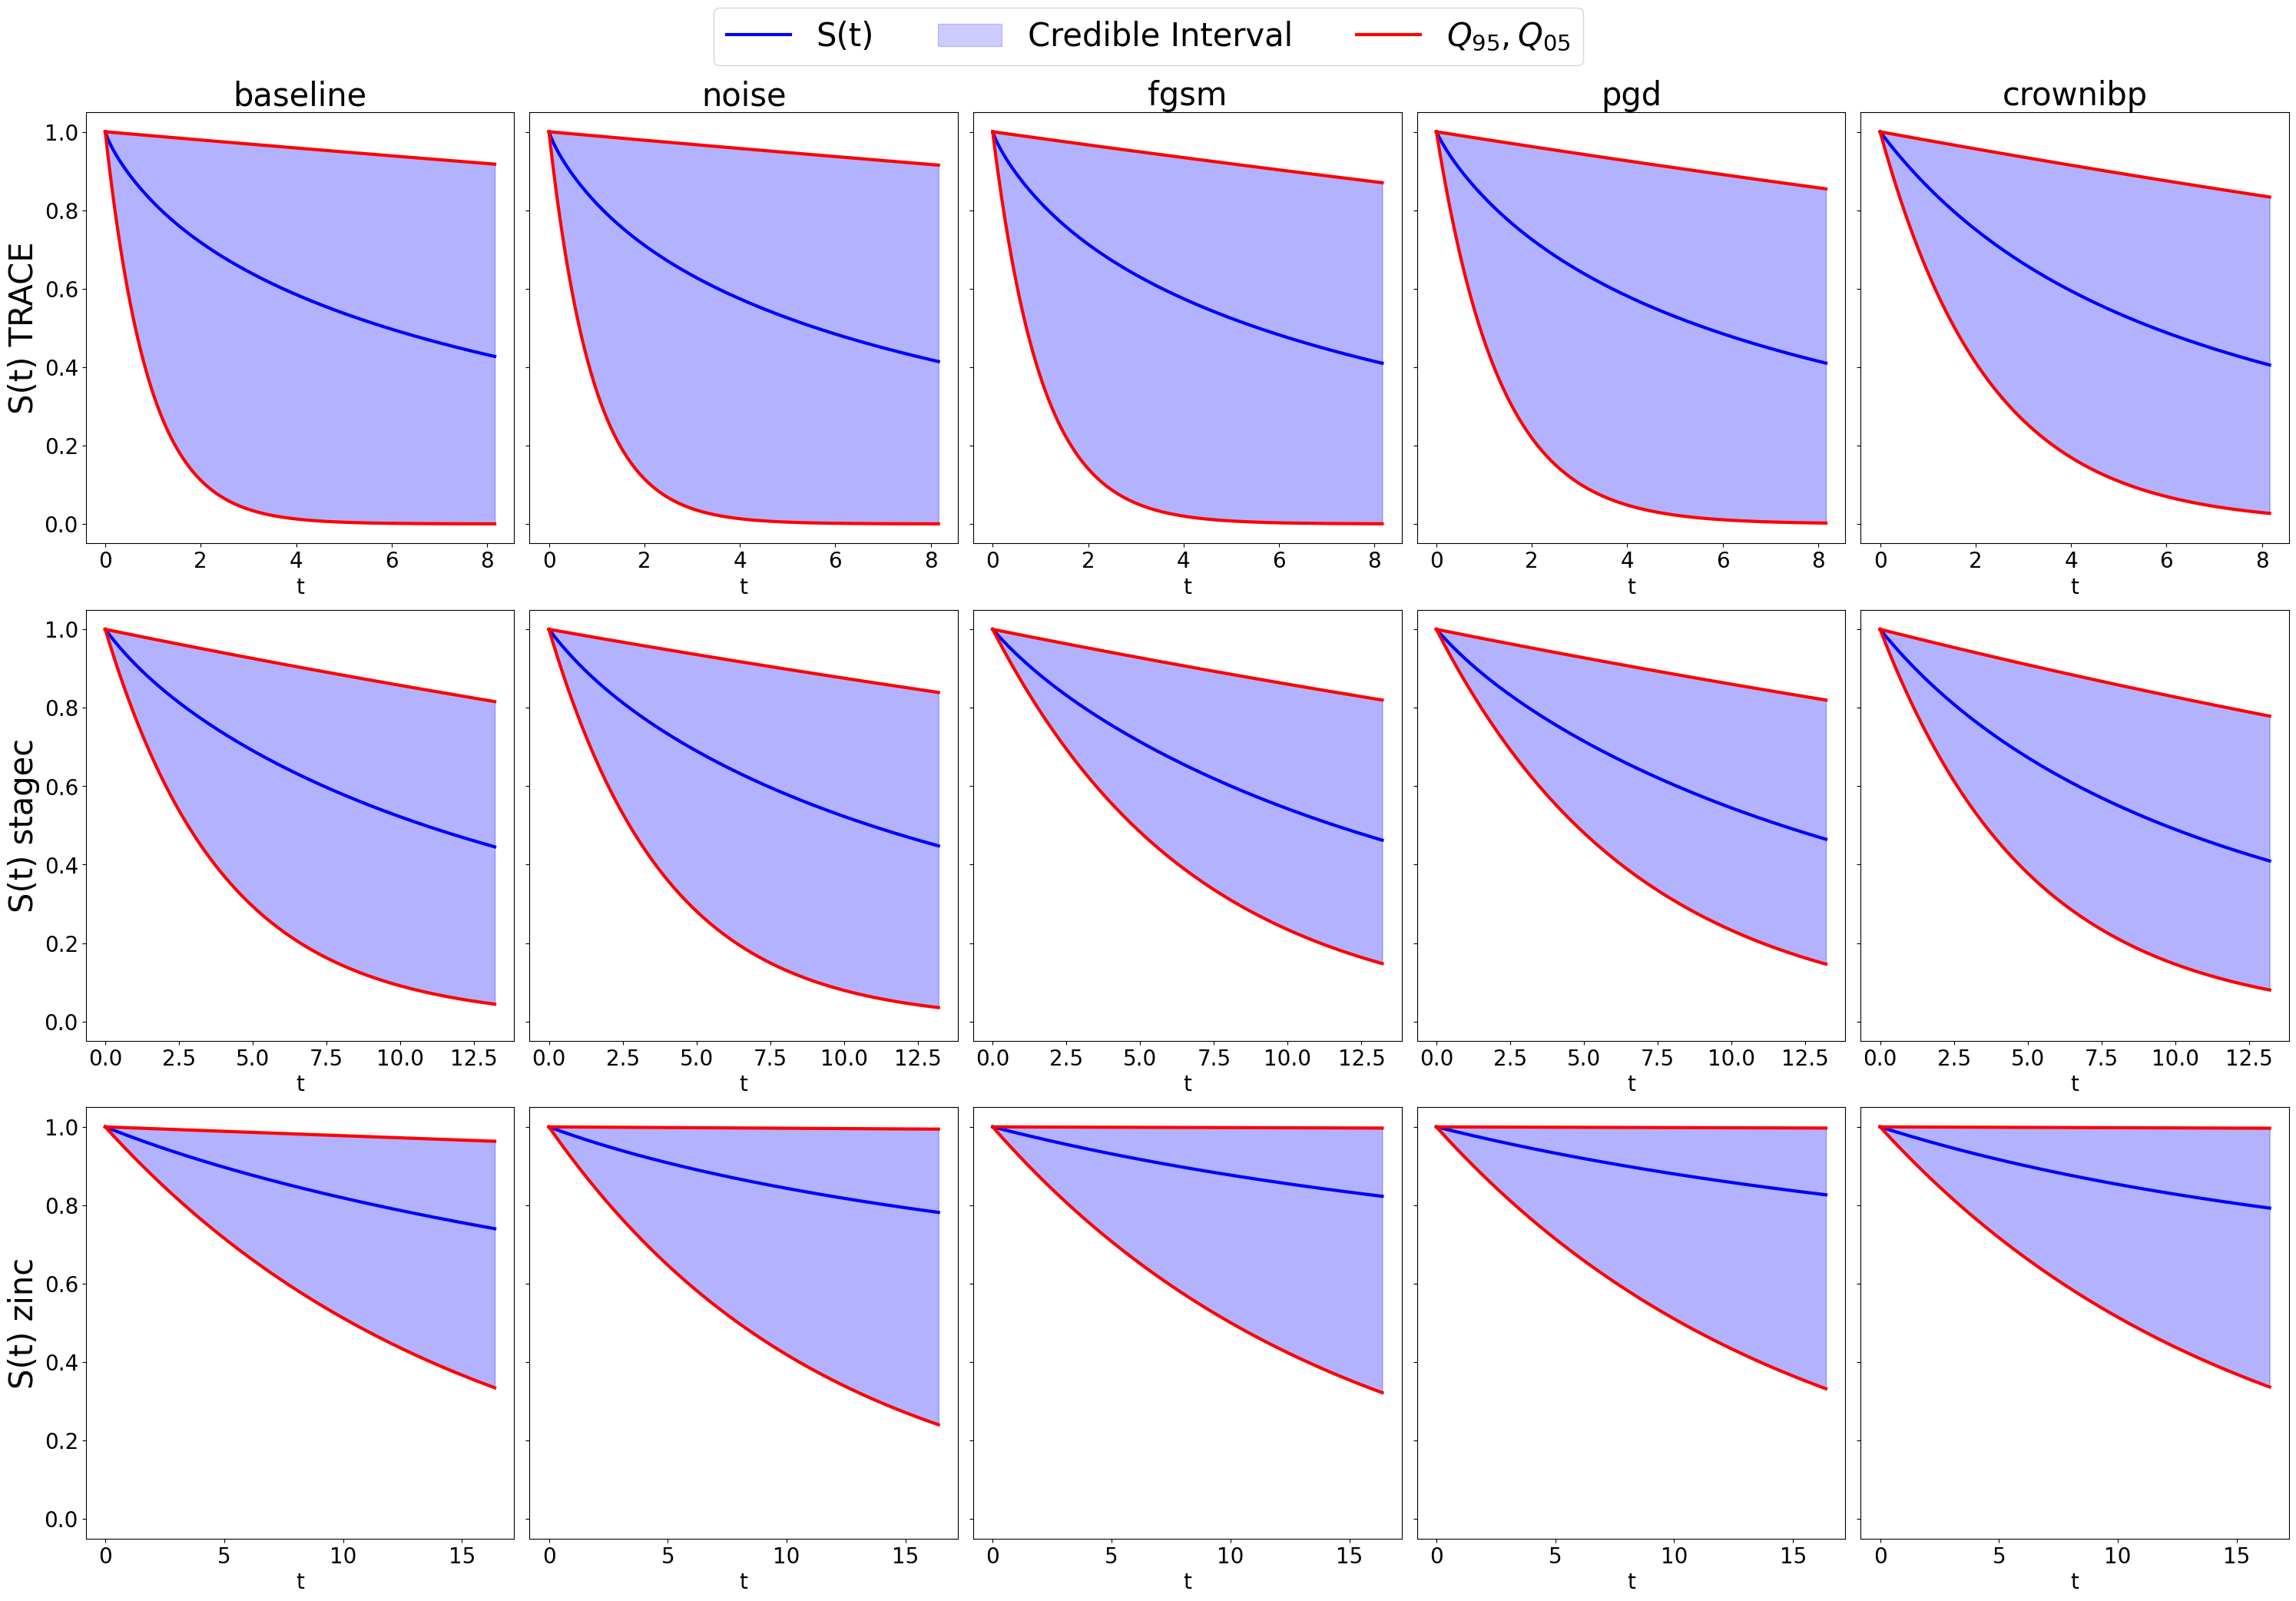

In [149]:
save_folder = results_folder = os.path.join(r"results",attack,"dist_curves_subset.pdf")
file_subset = files[[-7,-2,-1],:]

fig,axes = plt.subplots(3,n_cols+1,figsize=(30,20),sharey=True)

SMALL_SIZE = 20
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

for i in range(3):
    for j in range(n_cols):
        print(i,j)
        fileij = file_subset[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = [col.split("_")[1] for col in robust_df.columns]
        baseline_df.columns =[col.split("_")[1] for col in baseline_df.columns]
        
        mu = sns.lineplot(x=t, y=robust_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j+1],c='b',legend=False)
        q95 = sns.lineplot(x=t, y=robust_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        q05 = sns.lineplot(x=t, y=robust_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        axes[i][j+1].set_xlabel("t",fontsize=20)

        line = q05.get_lines()
        axes[i][j+1].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
        if j == 0:
            mu = sns.lineplot(x=t, y=baseline_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j],c='b',legend=False)
            q95 = sns.lineplot(x=t, y=baseline_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)
            q05 = sns.lineplot(x=t, y=baseline_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)

            axes[i][j].set_ylabel(f"S(t) {dataset}" ,fontsize=30)
            axes[i][j].set_xlabel("t",fontsize=20)
            line = q05.get_lines()
            axes[i][j].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
            axes[i][j].set_xlabel("t",fontsize=20)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=30)


labels = ["S(t)","Credible Interval","$Q_{95},Q_{05}$"]
fig.legend([mu,q95,q05], labels=labels, 
           loc="upper center",ncols=4,fontsize=30,bbox_to_anchor=(.5,1.05)) 

plt.tight_layout()
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()